# Gini Impurity and Entropy

---

## 1️⃣ Gini Impurity

### 📌 Definition

Gini Impurity measures the probability of incorrectly classifying a randomly chosen element if it was randomly labeled according to the class distribution in that node.

---

Gini Impurity tells us how mixed the classes are in a group

So basically:

Low Gini = Good split (clean group)

High Gini = Bad split (mixed group)

### 📐 Formula

$$
Gini = 1 - \sum p_i^2
$$

Where:

- $p_i$ = probability of class $i$

---

### ✅ Example

Suppose a node has:

- 70% Class A  
- 30% Class B  

$$
Gini = 1 - (0.7^2 + 0.3^2)
$$

$$
= 1 - (0.49 + 0.09)
$$

$$
= 1 - 0.58
$$

$$
= 0.42
$$

**Lower Gini = more pure**  
**Gini = 0 → perfectly pure (only one class)**

---

### 📊 Range

- 0 → Pure  
- Maximum ≈ 0.5 (for binary classification with 50-50 split)

---

## 2️⃣ Entropy

### 📌 Definition

Entropy measures the amount of uncertainty or disorder in a node.

It comes from information theory (introduced by Claude Shannon).

---

### 📐 Formula

$$
Entropy = - \sum p_i \log_2(p_i)
$$

---

### ✅ Example

Using the same 70% / 30% split:

$$
Entropy = - (0.7 \log_2 0.7 + 0.3 \log_2 0.3)
$$

$$
= - (0.7 \times -0.515 + 0.3 \times -1.737)
$$

$$
= 0.881
$$

---

### 📊 Range (Binary Case)

- 0 → Pure  
- 1 → Maximum uncertainty (50-50 split)

---

## 🔎 Key Differences

| Aspect | Gini Impurity | Entropy |
|--------|---------------|----------|
| Formula | $1 - \sum p^2$ | $-\sum p \log p$ |
| Range (binary) | 0 → 0.5 | 0 → 1 |
| Computation | Faster (no logs) | Slightly slower (logarithm) |
| Sensitivity | Slightly favors larger classes | More sensitive to class imbalance |

---

**Pruning:**  
Limiting the tree's growth to **prevent overfitting**.

**Overfitting:**  
When a tree learns the training data **too well** (memorizes noise), it performs poorly on new/unseen data.

In [1]:
# A simple conceptual representation of how a tree thinks
def decision_logic(weather, humidity):
    print(f"Analyzing: Weather={weather}, Humidity={humidity}")
   
    # Root Node Split
    if weather == 'Sunny':
        # Internal Node Split
        if humidity == 'High':
            return "Leaf: Don't Play"
        else:
            return "Leaf: Play"
    elif weather == 'Overcast':
        return "Leaf: Play"
    elif weather == 'Rainy':
        return "Leaf: Don't Play"

# Testing the logic
print(decision_logic('Sunny', 'High'))
print(decision_logic('Overcast', 'Normal'))

Analyzing: Weather=Sunny, Humidity=High
Leaf: Don't Play
Analyzing: Weather=Overcast, Humidity=Normal
Leaf: Play


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder

# 1. Prepare Data (Telco Churn simulation)
# We generate a synthetic dataset similar to the Telco structure

data = {
    'Tenure': np.random.randint(1, 72, 500),
    'MonthlyCharges': np.random.uniform(20, 120, 500),
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], 500),
    'TechSupport': np.random.choice(['Yes', 'No'], 500),
    'Churn': np.random.choice(['Yes', 'No'], 500, p=[0.3, 0.7]) # Target
}
df = pd.DataFrame(data)

In [3]:
le = LabelEncoder()

df['Contract'] = le.fit_transform(df['Contract'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['Churn'] = le.fit_transform(df['Churn'])

print(df.head())

   Tenure  MonthlyCharges  Contract  TechSupport  Churn
0      10       77.246058         2            0      0
1      24       96.025850         2            0      1
2      32      102.524547         1            1      0
3      25       24.975926         2            1      0
4       5       82.522049         2            0      0


In [7]:
X=df.drop("Churn",axis=1)
y=df["Churn"]

#split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
# 2. Train Decision Tree (Unconstrained - prone to overfitting)
dt_full = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_full.fit(X_train, y_train)

# 3. Train Decision Tree (Pruned - max_depth=3)
dt_pruned = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=42)
dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [9]:
# 4. Compare Performance
print(f"Full Tree Train Acc: {dt_full.score(X_train, y_train):.2f}")
print(f"Full Tree Test Acc:  {dt_full.score(X_test, y_test):.2f} (Likely Overfitting)")
print("-" * 30)
print(f"Pruned Tree Train Acc: {dt_pruned.score(X_train, y_train):.2f}")
print(f"Pruned Tree Test Acc:  {dt_pruned.score(X_test, y_test):.2f} (Better Generalization)")

Full Tree Train Acc: 1.00
Full Tree Test Acc:  0.60 (Likely Overfitting)
------------------------------
Pruned Tree Train Acc: 0.74
Pruned Tree Test Acc:  0.66 (Better Generalization)


In [11]:
y_pred = dt_pruned.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy:  {acc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-Score:  {f1:.2f}")

Accuracy:  0.66
Precision: 0.33
Recall:    0.03
F1-Score:  0.06


In [13]:
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[65  2]
 [32  1]]


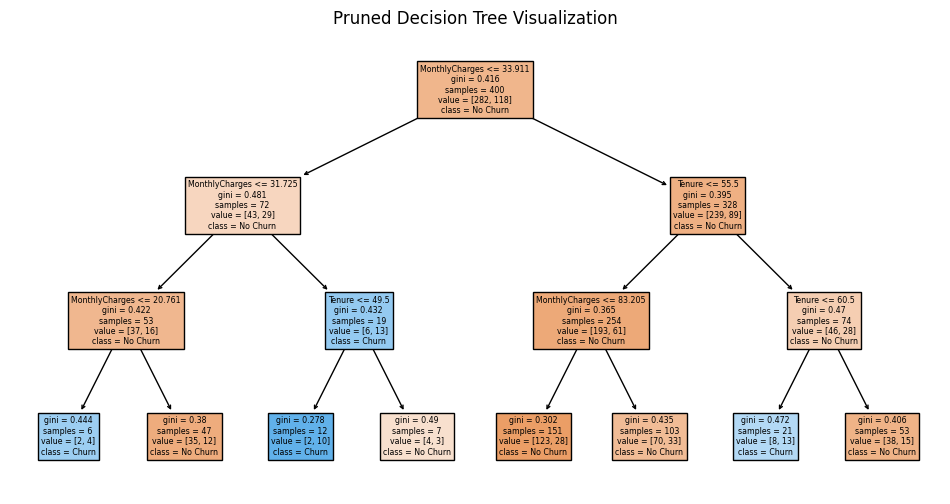

In [20]:
# 5. Visualize the Tree
plt.figure(figsize=(12, 6))
plot_tree(dt_pruned, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True)
plt.title("Pruned Decision Tree Visualization")
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
sorted_importances = importances.sort_values(ascending=False)
sorted_importances


MonthlyCharges    0.512610
Tenure            0.378804
Contract          0.067162
TechSupport       0.041424
dtype: float64

#  Understanding Information Gain (Using Gini)


$$
\textbf{Information Gain} = \textbf{Parent Gini} - \textbf{Weighted Child Gini}
$$


---

##  Step 1: What Is Parent Gini?

At the root node we have:

- **400 customers**
- **287 No Churn**
- **113 Churn**

---

###  Step 1.1: Calculate Probabilities

$$
p_{No} = \frac{287}{400} = 0.7175
$$

$$
p_{Yes} = \frac{113}{400} = 0.2825
$$

---

###  Step 1.2: Apply Gini Formula

$$
\text{Gini} = 1 - (p_1^2 + p_2^2)
$$

$$
= 1 - (0.7175^2 + 0.2825^2)
$$

$$
= 1 - (0.515 + 0.079)
$$

$$
= 1 - 0.594
$$

$$
= 0.406
$$

 **Parent Gini = 0.406**

This means the data is somewhat mixed.

---

##  Step 2: Try a Split

Suppose we split on:

$$
\textbf{MonthlyCharges} \le 21.54
$$

After the split:

###  Left Child
- 6 samples  
- 1 No Churn  
- 5 Churn  

###  Right Child
- 394 samples  
- 286 No Churn  
- 108 Churn  

---

##  Step 3: Calculate Gini of Each Child

###  Left Node Gini

$$
p_{No} = \frac{1}{6}
$$

$$
p_{Yes} = \frac{5}{6}
$$

$$
\text{Gini} = 1 - \left(\left(\frac{1}{6}\right)^2 + \left(\frac{5}{6}\right)^2\right)
$$

$$
= 1 - (0.027 + 0.694)
$$

$$
= 1 - 0.721
$$

$$
= 0.279
$$

✔ Matches the tree output.

---

###  Right Node Gini

$$
p_{No} = \frac{286}{394}
$$

$$
p_{Yes} = \frac{108}{394}
$$

$$
\text{Gini} \approx 0.398
$$

---

##  Step 4: Calculate Weighted Child Gini

$$
\text{Weighted Gini} =
\frac{n_{\text{left}}}{n_{\text{total}}} G_{\text{left}}
+ \frac{n_{\text{right}}}{n_{\text{total}}} G_{\text{right}}
$$

$$
\text{Weighted Gini}
=
\frac{6}{400} \times 0.279
+
\frac{394}{400} \times 0.398
$$

$$
= 0.015 \times 0.279
+
0.985 \times 0.398
$$

$$
\approx 0.396
$$

---

##  Step 5: Calculate Information Gain

$$
\text{Information Gain}
=
\text{Parent Gini}
-
\text{Weighted Child Gini}
$$

$$
= 0.406 - 0.396
$$

$$
= 0.010
$$

---

#  Final Result

$$
\boxed{\text{Information Gain} = 0.010}
$$

This means the split reduces impurity only slightly.

In [19]:
import numpy as np

new_customer = np.array([[1, 20.5, 3,1]])  
# Example order: [MonthlyCharges, TechSupport,Contract,TechSupport]


prediction = dt_pruned.predict(new_customer)

print(prediction)

[1]


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
